<a href="https://colab.research.google.com/github/Engr-Umer/The-Spark-Foundation/blob/Internship/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Author: Muhammad Umer Mujahid.**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [30]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [31]:
# Preprocess the dataset if needed (e.g., handle missing values, scale features)

# Split the dataset into features (X) and target variable (y)
X = data.drop('Scores', axis=1)  # Replace 'target_variable' with the name of your target column
y = data['Scores']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform predictions on the testing set
y_pred = model.predict(X_test)


### **Plotting Predicted vs Actual**


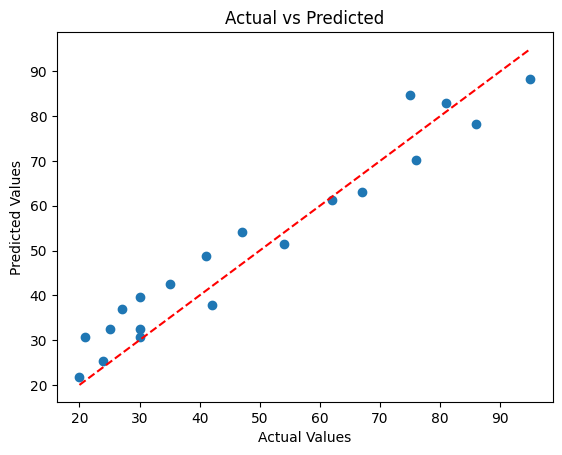

In [32]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,81,82.841482
16,30,30.746861
0,21,30.746861
23,76,70.266918
11,62,61.285087
9,25,32.543228
13,42,37.932326
1,47,54.099622
22,35,42.423242
5,20,21.765030


In [34]:
# Predict the score for 9.25 hours of study
hours = 9.25
predicted_score = model.predict([[hours]])

print(f"Predicted Score for {hours} hours of study: {predicted_score[0]}")

Predicted Score for 9.25 hours of study: 91.37422170052056


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.431325916096766


In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 39.84055267161722
R-squared: 0.9284138558385431
